In [2]:
import qiskit
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

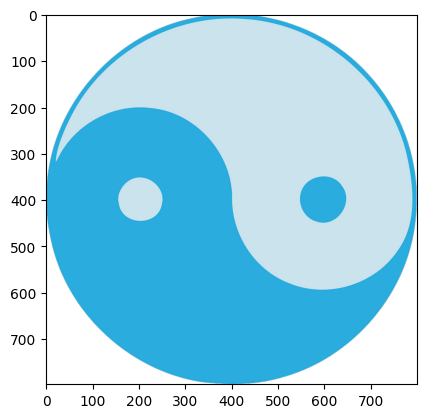

In [3]:
filename = r"D:\6m_NIC\images\schrodin.png"
im = mpimg.imread(filename)
fig, ax = plt.subplots()
ax.imshow(im)

In [4]:
from skimage.transform import resize

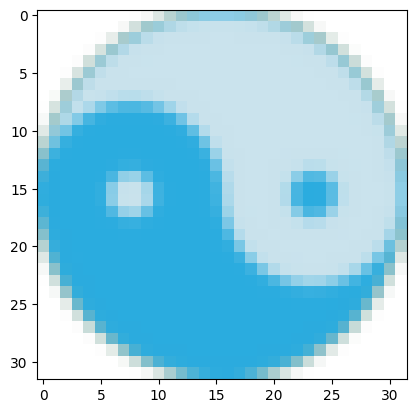

In [5]:
n_pixels = 2**5
im = resize(im, (n_pixels, n_pixels))
fig, ax = plt.subplots()
ax.imshow(im)

In [6]:
data = im[:,:,0].ravel()

In [40]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

class Custom:
    def __init__(self, n_qubits, state_vector):
        self.n_qubits = n_qubits
        self.state_vector = state_vector

    def apply(self, circuit):
        # Apply the custom state to the circuit
        circuit.initialize(self.state_vector, range(self.n_qubits))

    def construct_circuit(self, circuit_name):
        # Create a quantum circuit with the specified number of qubits
        qc = QuantumCircuit(self.n_qubits, self.n_qubits)  # Optional: add classical bits if needed
        self.apply(qc)  # Apply the initial state
        qc.name = circuit_name  # Name the circuit
        return qc


# Example data
data = [1/np.sqrt(2), 1/np.sqrt(2)]  # Example state vector |+>
n_qubits = int(np.log2(len(data)))  # Calculate number of qubits
init_state = Custom(n_qubits, state_vector=data)  # Instantiate

# Create a quantum circuit
qc = QuantumCircuit(n_qubits)
init_state.apply(qc)

# Execute the circuit
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [41]:
n_qubits   = np.int_(np.log2(len(data)))
init_state = Custom(n_qubits, state_vector=data)

In [42]:
circ = init_state.construct_circuit('circuit')
qr   = circ.qregs

In [43]:
from copy import deepcopy

In [44]:
circ_init = deepcopy(circ)

In [45]:
circ.h(qr[0][0])

In [46]:
from qiskit_aer import Aer

simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circ).result()
final_state_vector = result.get_statevector(circ)

In [47]:
edge_even = np.real(final_state_vector)
n_rows    = int(np.sqrt(len(edge_even)))
edge_even = edge_even.reshape(n_rows, -1)

In [48]:
edge_even[:,::2] = 0

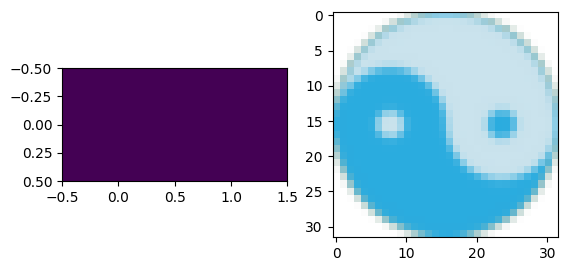

In [49]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(edge_even)
ax[1].imshow(im)

In [60]:
circ = deepcopy(circ_init)
qr   = circ.qregs

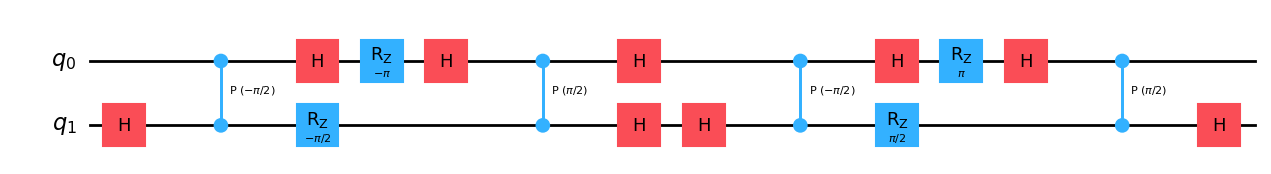

In [62]:
from qiskit import QuantumCircuit, QuantumRegister
from math import pi
from copy import deepcopy

# Function for Inverse Quantum Fourier Transform (IQFT)
def iqft(circuit, q, n):
    for j in range(n):
        for k in range(j):
            circuit.cp(-pi / float(2 ** (j - k)), q[int(n - j - 1)], q[int(n - k - 1)])
        circuit.h(q[int(n - j - 1)])

# Function to apply the shift operation after the IQFT
def shiftBases(circuit, q, n, p):
    iqft(circuit, q, n)
    for k in range(n):
        circuit.rz(-p * 2 * pi / float(2 ** (n - k)), q[int(n - k - 1)])  # Use rz instead of u1
    qft(circuit, q, n)

# Function for Quantum Fourier Transform (QFT)
def qft(circuit, q, n):
    for j in range(n):
        circuit.h(q[j])
        for k in range(j + 1, n):
            circuit.cp(pi / float(2 ** (k - j)), q[k], q[j])

# Main code to create a quantum circuit
n_qubits = 2  # Number of qubits
qr = QuantumRegister(n_qubits, 'q')
circ_init = QuantumCircuit(qr)

# Example initialization of the circuit
# Initialize your circuit here as needed

# Example usage
circ = deepcopy(circ_init)
qr = circ.qregs

shiftBases(circ, qr[0], n_qubits, 1)
circ.h(qr[0][0])
shiftBases(circ, qr[0], n_qubits, -1)

# Draw the quantum circuit
circ.draw(output='mpl')


In [64]:
from qiskit_aer import Aer
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circ).result()
final_state_vector = result.get_statevector(circ)

In [65]:
edge_odd = np.real(final_state_vector)
n_rows = np.int_(np.sqrt(len(edge_odd)))
edge_odd = edge_odd.reshape(n_rows, -1)

In [66]:
edge_odd[:,1::2] = 0

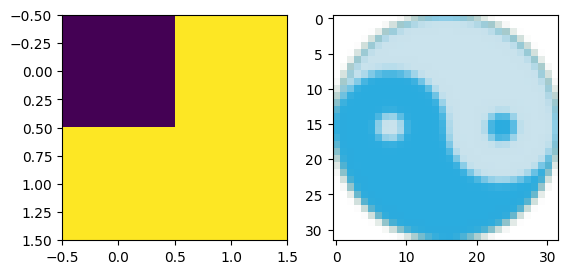

In [67]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(edge_odd)
ax[1].imshow(im)

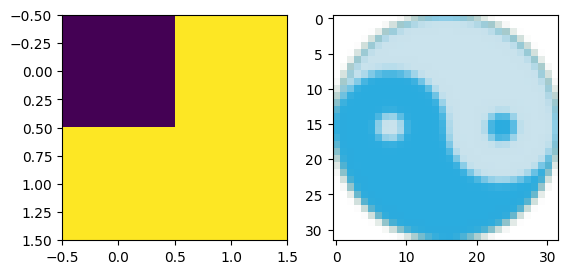

In [68]:
edge = edge_even + edge_odd

fig, ax = plt.subplots(1,2)
ax[0].imshow(edge)
ax[1].imshow(im)